<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Дополнительные-расчеты" data-toc-modified-id="Дополнительные-расчеты-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Дополнительные расчеты</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Данные-о-событиях-в-мобильной-игре" data-toc-modified-id="Данные-о-событиях-в-мобильной-игре-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Данные о событиях в мобильной игре</a></span></li><li><span><a href="#Данные-рекламных-активностей" data-toc-modified-id="Данные-рекламных-активностей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Данные рекламных активностей</a></span></li></ul></li><li><span><a href="#Анализ-влияния-источника-перехода-в-игру-на-поведение-пользователей" data-toc-modified-id="Анализ-влияния-источника-перехода-в-игру-на-поведение-пользователей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ влияния источника перехода в игру на поведение пользователей</a></span></li><li><span><a href="#Проверка-статистических-гипотез" data-toc-modified-id="Проверка-статистических-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка статистических гипотез</a></span><ul class="toc-item"><li><span><a href="#Зависимость-времени-завершения-уровня-от-способа-прохождения" data-toc-modified-id="Зависимость-времени-завершения-уровня-от-способа-прохождения-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Зависимость времени завершения уровня от способа прохождения</a></span></li><li><span><a href="#Зависимость-количества-построек-от-способа-прохождения-уровня" data-toc-modified-id="Зависимость-количества-построек-от-способа-прохождения-уровня-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Зависимость количества построек от способа прохождения уровня</a></span></li></ul></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общие выводы</a></span></li></ul></div>

# Анализ рекламных источников мобильной игры

Цель исследования: Выявить особенности поведения пользователей в зависимости от источника перехода в игру.

Задачи:
* Провести исследовательский анализ данных;
* Проанализировать влияние источника перехода в игру на поведение пользователей;
* Выдвинуть и проверить статистические гипотезы.

Для решения задач проекта будут использованы данные о событиях, совершенных в мобильной игре на первом уровне когортой пользователей, которые начали пользоваться приложением с 4 по 10 мая включительно; а также, данные с информацией о рекламных активностях. 

In [1]:
#импорт библиотек
import pandas as pd
import datetime as dt
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Предобработка данных

In [2]:
#запись датасетов в переменные
game_actions = pd.read_csv('game_actions.csv') #данные событий в игре
ad_costs = pd.read_csv('ad_costs.csv') #данные стоимости рекламы
user_source = pd.read_csv('user_source.csv') #данные рекламных источников

In [3]:
#функция первичного анализа данных
def data_review(data):
    data.info()
    display(data.head(5))
    print('Количество строк-дубликатов:', data.duplicated().sum())
    for i in list(data.columns):
        if data[i].dtypes == 'float64' or data[i].dtypes == 'int64':
            display(data[i].describe())
        if data[i].dtypes == 'object' and i != 'user_id':
            display(data[i].value_counts())           
    print('*'*50)

In [4]:
datasets = {'game_actions':game_actions, 'ad_costs':ad_costs, 'user_source':user_source}

for key in datasets.keys():
    print('\033[1m{}'.format(key))
    print('\033[0m')
    data_review(datasets.get(key))

game_actions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


Количество строк-дубликатов: 1


2020-05-09 12:35:56    4
2020-05-09 21:49:07    4
2020-05-07 03:10:43    4
2020-05-07 17:57:40    4
2020-05-10 03:08:18    4
                      ..
2020-05-08 16:57:22    1
2020-05-08 16:57:21    1
2020-05-08 16:57:06    1
2020-05-08 16:56:40    1
2020-06-05 12:32:49    1
Name: event_datetime, Length: 128790, dtype: int64

building            127957
finished_stage_1      5817
project               1866
Name: event, dtype: int64

spaceport          59325
assembly_shop      54494
research_center    14138
Name: building_type, dtype: int64

satellite_orbital_assembly    1866
Name: project_type, dtype: int64

**************************************************
ad_costs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


Количество строк-дубликатов: 0


facebook_ads               7
instagram_new_adverts      7
yandex_direct              7
youtube_channel_reklama    7
Name: source, dtype: int64

2020-05-03    4
2020-05-04    4
2020-05-05    4
2020-05-06    4
2020-05-07    4
2020-05-08    4
2020-05-09    4
Name: day, dtype: int64

count     28.000000
mean     271.556321
std      286.867650
min       23.314669
25%       66.747365
50%      160.056443
75%      349.034473
max      969.139394
Name: cost, dtype: float64

**************************************************
user_source

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


Количество строк-дубликатов: 0


yandex_direct              4817
instagram_new_adverts      3347
facebook_ads               2726
youtube_channel_reklama    2686
Name: source, dtype: int64

**************************************************


В наборе данных game_actions обнаружена 1 дублирующая строка, удалим ее.

In [5]:
game_actions = game_actions.drop_duplicates().reset_index(drop=True)
print('Обнаружено дубликатов в game_actions:', game_actions.duplicated().sum())

Обнаружено дубликатов в game_actions: 0


Все переменные в таблицах имеют формат object, за исключением стоимости кликов с форматом float. Приведем данные с информацией о дате и времени к формату datetime. В наборе данных game_actions создадим дополнительную переменную только с датой.

In [6]:
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'])
game_actions['event_date'] = game_actions['event_datetime'].dt.date
ad_costs['day'] = pd.to_datetime(ad_costs['day']).dt.date

Рассмотрим корректность временных отрезков в датасетах.

In [7]:
print('Для game_actions')
print('Минимальное время события:', game_actions['event_datetime'].min())
print('Максимальное время события:', game_actions['event_datetime'].max())

Для game_actions
Минимальное время события: 2020-05-04 00:00:01
Максимальное время события: 2020-06-05 12:32:49


In [8]:
print('Для ad_costs')
print('Минимальный день клика по объявлению:', ad_costs['day'].min())
print('Максимальный день клика по объявлению:', ad_costs['day'].max())

Для ad_costs
Минимальный день клика по объявлению: 2020-05-03
Максимальный день клика по объявлению: 2020-05-09


Мы имеем три датасета, с событиями, стоимостью рекламы и источниками: 

- события (building, finished_stage_1, project) зафиксированы с 4 мая 2020 по 5 июня 2020;
- событию building соответстуют три building_type: 'assembly_shop', 'spaceport' и 'research_center'; а событию project - project_type 'satellite_orbital_assembly'; 
- датасет game_actions имеет пропуски в данных в полях building_type и project_type. В первом случае пропущенные значения означают отсутствие события building у пользователя, во втором - события project;
- первый день клика по объявлению в данных ad_costs фактически является днем оплаты показа рекламы - 3 мая 2020, крайний день клика по объявлению - 9 мая 2020, где показ рекламы происходит на следующий день, после оплаты;
- показы совершались в четырех рекламных источниках: facebook_ads, yandex_direct, youtube_channel_reklama, instagram_new_adverts;
- стоимость кликов имеет значительный разброс - при среднем значении 271р. и стандартным отклонением в 286р;
- в данных о событиях удалена одна дублирующая строка, пропуски оставлены без заполнения и не влияют на качество данных. Все данные приведены к соответствующим форматам и имеют корректные значения.

## Дополнительные расчеты

Для проведения дальнейшего анализа данных, создадим дополнительные переменные и таблицы.

Для расчета дней, затраченных на прохождение уровня и лайфтайма игроков, создадим новые переменные с датой и временем первого события и крайнего события игроков.

In [9]:
first_last_actions = (
    game_actions.sort_values(by=['user_id', 'event_datetime'])
    .groupby('user_id')
    .agg({'event_datetime':['first', 'last']})
    .reset_index()
)
first_last_actions.columns = ['user_id', 'first_event', 'last_event']
first_last_actions.head()

,user_id,first_event,last_event
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,2020-05-20 11:26:06
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,2020-05-18 10:46:52
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,2020-05-14 09:21:27
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:58,2020-05-22 02:46:45


In [10]:
#добавление новых переменных к датасету с событиями
game_actions = game_actions.merge(first_last_actions, on='user_id', how='left')
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,event_date,first_event,last_event
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04 00:00:01,2020-05-10 20:27:01
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,2020-05-04 00:00:03,2020-05-15 05:29:13
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04,2020-05-04 00:00:16,2020-05-16 11:51:58
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,2020-05-04,2020-05-04 00:00:16,2020-05-12 04:29:54
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04,2020-05-04 00:00:35,2020-05-11 14:18:05


In [11]:
#расчет лайфтайма
game_actions['lifetime'] = (game_actions['last_event'] - game_actions['first_event']).dt.days
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,event_date,first_event,last_event,lifetime
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04 00:00:01,2020-05-10 20:27:01,6
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,2020-05-04 00:00:03,2020-05-15 05:29:13,11
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04,2020-05-04 00:00:16,2020-05-16 11:51:58,12
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,2020-05-04,2020-05-04 00:00:16,2020-05-12 04:29:54,8
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04,2020-05-04 00:00:35,2020-05-11 14:18:05,7


Также, создадим таблицу с пользовательскими профилями, которая будет содержать информацию об источнике перехода в игру, количестве построек, лайфтайм, флаг завершения уровня и использованная стратегия прохождения уровня.

In [12]:
#игроки, которые прошли уровень 
users_finished_stage = game_actions.query('event == "finished_stage_1"')['user_id']

In [13]:
#игроки, которые прошли уровень сделав проект
wins_with_project = game_actions.query('event == "project" and user_id in @users_finished_stage')['user_id']

In [14]:
#игроки, которые прошли уровень победив другого игрока
wins_with_fight = game_actions.query('event == "finished_stage_1" and user_id not in @wins_with_project')['user_id']

In [15]:
#проверка пересечения списков игроков
len(set(wins_with_project).intersection(set(wins_with_fight)))

0

In [16]:
profiles = (
    user_source.merge(game_actions.groupby('user_id')
                      .agg({'building_type':'count', 'lifetime':'first'})
                      .reset_index()
                      .rename(columns={'building_type':'building_number'}), on='user_id', how='left')
)

profiles['finished_stage'] = profiles['user_id'].isin(users_finished_stage)

#функция заполнения профилей игроков выбранной стратегией прохождения уровня
def filling_strategy(row):
    if row['user_id'] in list(wins_with_project):
        return 'project'
    elif row['user_id'] in list(wins_with_fight):
        return 'fight' 

profiles['strategy'] = profiles.apply(filling_strategy, axis=1)

In [17]:
profiles.info()
profiles.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13576 entries, 0 to 13575
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          13576 non-null  object
 1   source           13576 non-null  object
 2   building_number  13576 non-null  int64 
 3   lifetime         13576 non-null  int64 
 4   finished_stage   13576 non-null  bool  
 5   strategy         5817 non-null   object
dtypes: bool(1), int64(2), object(3)
memory usage: 649.6+ KB


,user_id,source,building_number,lifetime,finished_stage,strategy
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,13,14,False,None
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct,9,12,False,None
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama,4,8,False,None
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts,8,6,True,fight
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads,12,16,False,None


Созданый датафрэйм содержит 13 576 строк с информацией по каждому пользователю.Переменная finished_stage принимает значение True при появлении у игрока события finished_stage и False при отсутствии события. Переменная strategy принимает два значения для пользователей, которые завершили уровень, fight - победой над первым врагом и project - реализовав проект.

## Исследовательский анализ данных

### Данные о событиях в мобильной игре

Анализ распределения событий по времени.

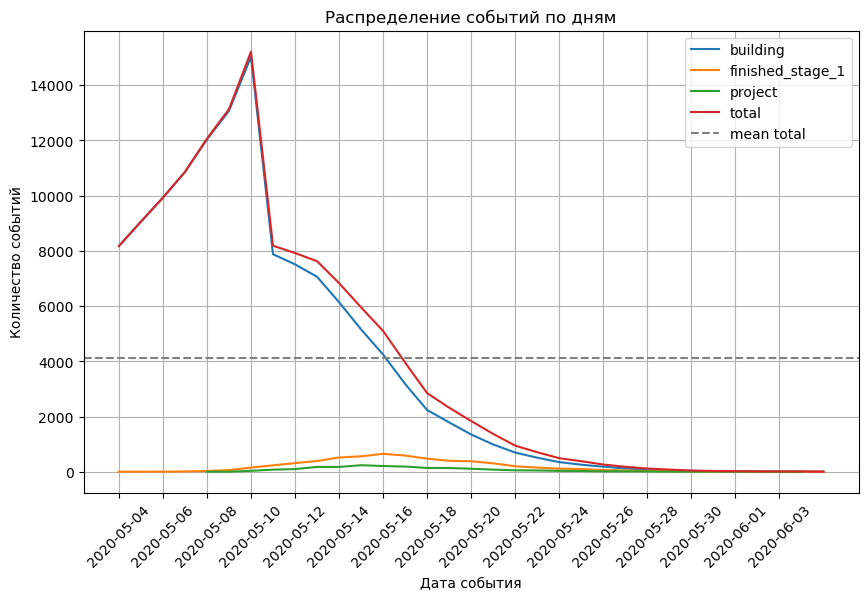

In [18]:
events_per_day = game_actions.pivot_table(index='event_date', columns='event', values='user_id', aggfunc='count')
events_per_day['total'] = events_per_day.apply(lambda x: x.sum(), axis=1)

events_per_day.plot(figsize=(10, 6), grid=True)
plt.axhline(y=events_per_day['total'].mean(), color='gray', linestyle='--', label='mean total')
plt.title('Распределение событий по дням')
plt.xlabel('Дата события')
plt.ylabel('Количество событий')
plt.xticks(rotation=45)
plt.xticks(np.arange(min(events_per_day.index), max(events_per_day.index), 2))
plt.legend()
plt.show()

Строительство - наиболее частое событие, так как на одного игрока приходится несколько построек за уровень, а события project и finished_stage_1 наступают один раз. Пик активности строительства приходится на 10 мая, прошедших уровень было больше 16 мая. После 26 мая отмечается минимальная активность пользователей.

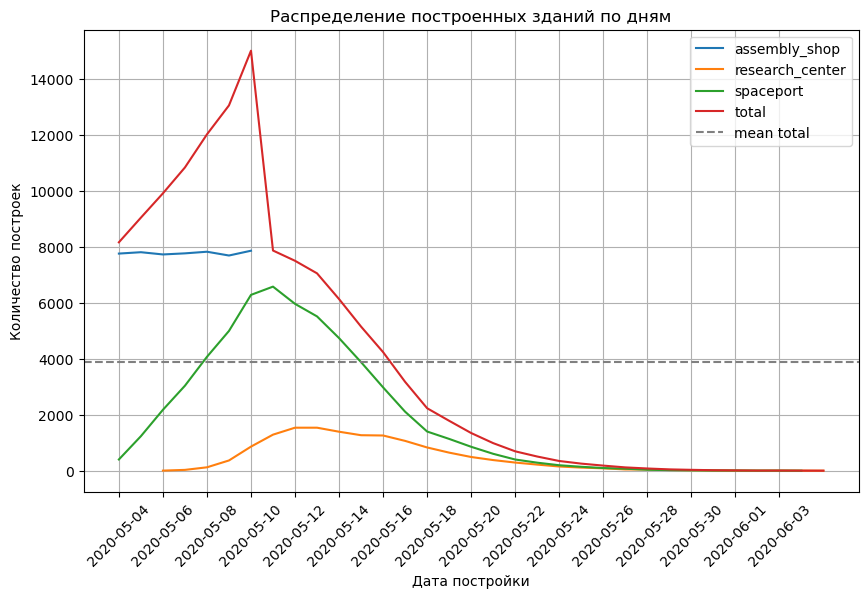

In [19]:
buildings_per_day = game_actions.pivot_table(
    index='event_date', columns='building_type', values='user_id', aggfunc='count'
)
buildings_per_day['total'] = buildings_per_day.apply(lambda x: x.sum(), axis=1)

buildings_per_day.plot(figsize=(10, 6), grid=True)
plt.axhline(y=buildings_per_day['total'].mean(), color='gray', linestyle='--', label='mean total')
plt.title('Распределение построенных зданий по дням')
plt.xlabel('Дата постройки')
plt.ylabel('Количество построек')
plt.xticks(rotation=45)
plt.xticks(np.arange(min(buildings_per_day.index), max(buildings_per_day.index), 2))
plt.legend()
plt.show()

Постройки типа assembly_shop встречаются только в период с 4 мая по 10 мая, в дни прихода пользователей в игру. Так как в остальной период данные постройки не встречаются, можно предположить, что именно с них начинается игра. После 10 мая наиболее популярны постройки типа spaceport, менее популярны - research center.

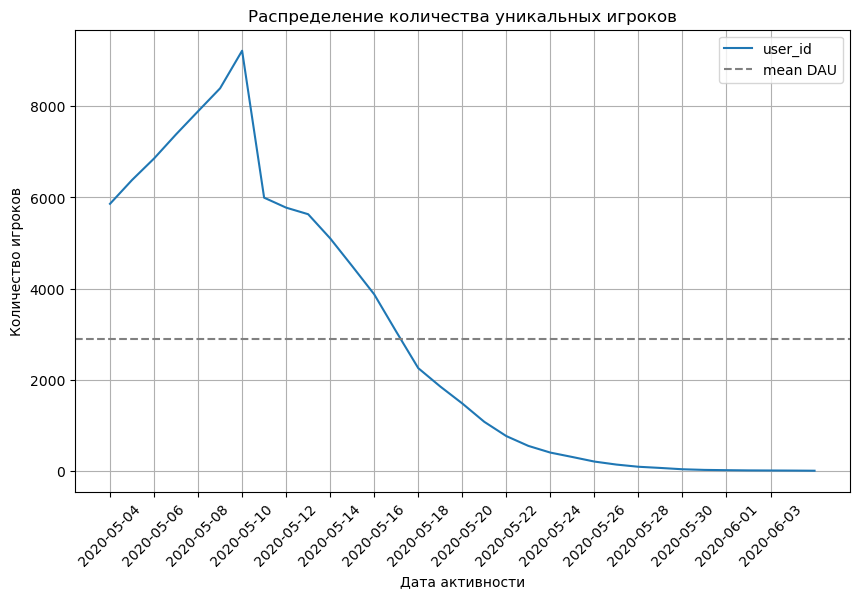

In [20]:
unique_users_per_day = game_actions.pivot_table(index='event_date', values='user_id', aggfunc='nunique')

unique_users_per_day.plot(figsize=(10, 6), grid=True)
plt.axhline(y=unique_users_per_day['user_id'].mean(), color='gray', linestyle='--', label='mean DAU')
plt.title('Распределение количества уникальных игроков')
plt.xlabel('Дата активности')
plt.ylabel('Количество игроков')
plt.xticks(rotation=45)
plt.xticks(np.arange(min(unique_users_per_day.index), max(unique_users_per_day.index), 2))
plt.legend()
plt.show()

Количество уникальных пользователей имеет стремительный рост в дни показов рекламы. Затем, количество уникальных пользователей в день снижается, что может быть связано как с прохождением уровня, так и с покиданием игры.

Оценим частотное распределение игровых событий.

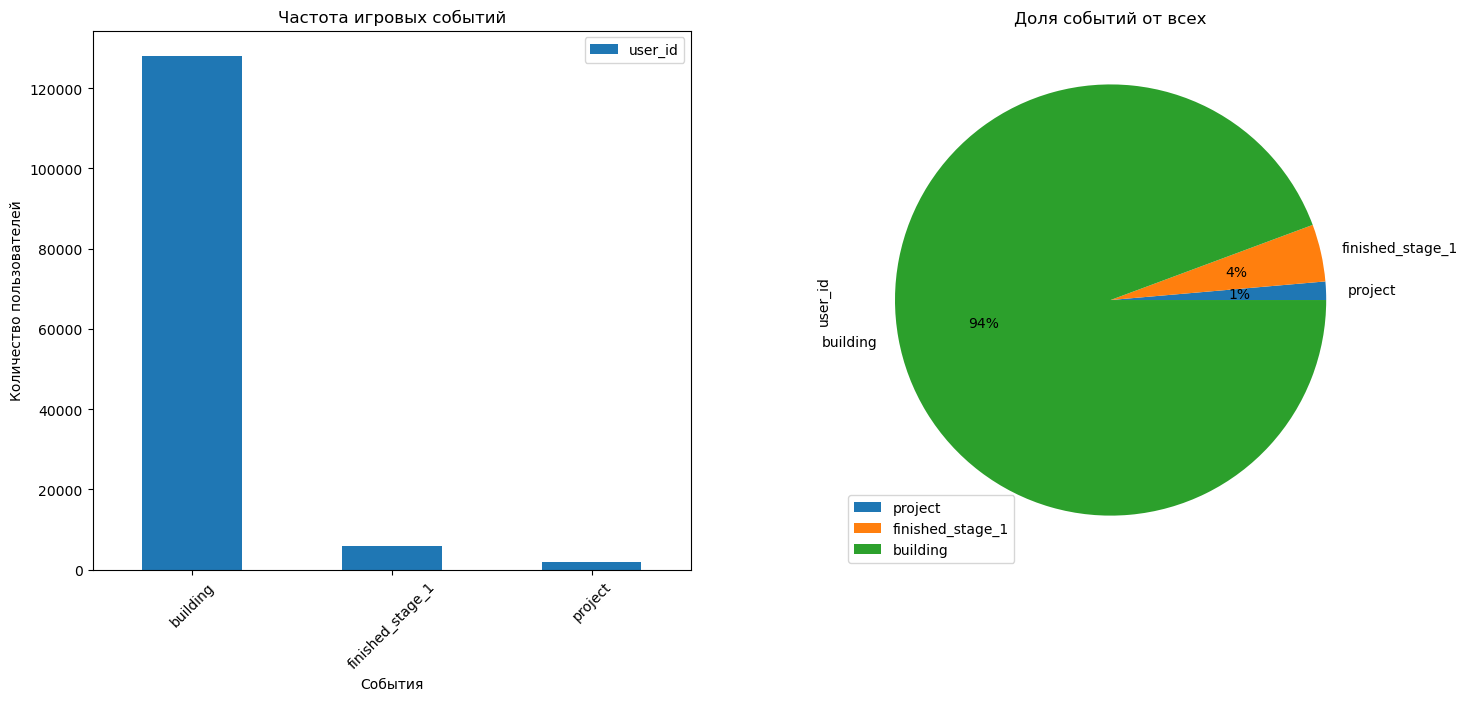

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(17, 7))

ax1 = (
    game_actions.groupby('event')
    .agg({'user_id':'count'})
    .sort_values('user_id', ascending=False)
    .plot(kind='bar', ax=axes[0])
)
ax1.set_title('Частота игровых событий')
ax1.set_ylabel('Количество пользователей')
ax1.set_xlabel('События')
ax1.tick_params(axis='x', labelrotation=45)

ax2 = (
    game_actions.groupby('event')
    .agg({'user_id':'count'})
    .sort_values('user_id')
    .plot(kind='pie', y='user_id', autopct='%1.0f%%', ax=axes[1])
)
ax2.set_title('Доля событий от всех')
ax2.legend(loc='lower left')

plt.show()

Строительство - наиболее встречающееся событие, так как случается неоднократно и у каждого пользователя. На строительство приходится 94% от всех событий за уровень. Завершение уровня и реализация проекта встречаются значительно реже, так как происходят однократно и не у каждого пользователя. Завершение уровня случается чаще, чем реализация проекта, так как второе является одним из способов достижения первого.

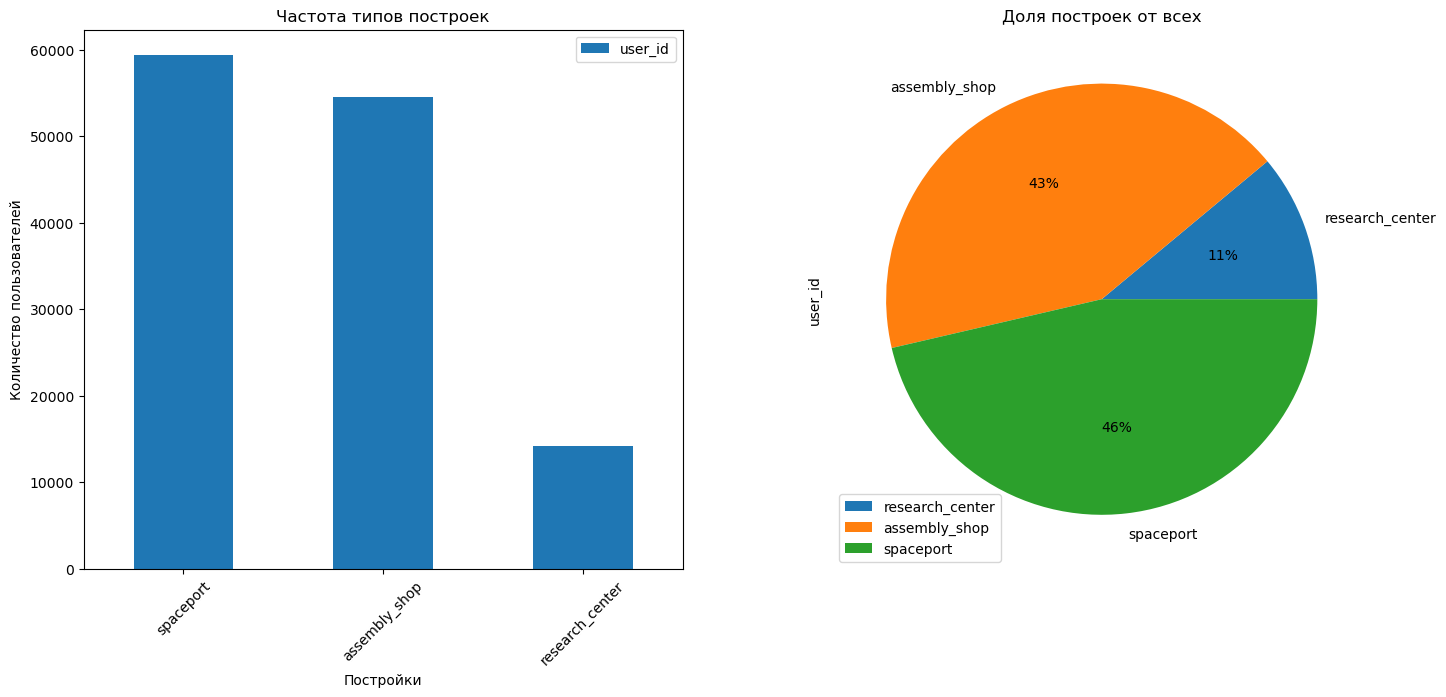

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(17, 7))

ax1 = (
    game_actions.groupby('building_type')
    .agg({'user_id':'count'})
    .sort_values('user_id', ascending=False)
    .plot(kind='bar', ax=axes[0])
)
ax1.set_title('Частота типов построек')
ax1.set_ylabel('Количество пользователей')
ax1.set_xlabel('Постройки')
ax1.tick_params(axis='x', labelrotation=45)

ax2 = (
    game_actions.groupby('building_type')
    .agg({'user_id':'count'})
    .sort_values('user_id')
    .plot(kind='pie', y='user_id', autopct='%1.0f%%', ax=axes[1])
)
ax2.set_title('Доля построек от всех')
ax2.legend(loc='lower left')

plt.show()

Наиболее частые виды построек у игроков spaceport и assembly shop. Реже всего строят research centre, они составляют только 11% от всех построек за уровень. 

In [23]:
print('Доля игроков, завершивших уровень: {:.1%}'.format(
    game_actions.query('event == "finished_stage_1"')['user_id'].nunique() / game_actions['user_id'].nunique())
     )

Доля игроков, завершивших уровень: 42.8%


In [24]:
print('Среднее число событий на игрока: {:.1f}'.format(
    game_actions.groupby('user_id').agg({'event':'count'})['event'].mean())
     )
print('Среднее число построек на игрока: {:.1f}'.format(
    game_actions.groupby('user_id').agg({'building_type':'count'})['building_type'].mean())
     )

Среднее число событий на игрока: 10.0
Среднее число построек на игрока: 9.4


In [25]:
print('Среднее число дней в игре: {:.1f}'.format(
    profiles['lifetime'].mean())
     )
print('Среднее число дней затраченных на прохождение уровня: {:.1f}'.format(
    profiles.query('finished_stage == True')['lifetime'].mean())
     )
print('Среднее число дней в игре у не завершивших уровень: {:.1f}'.format(
    profiles.query('finished_stage == False')['lifetime'].mean())
     )

Среднее число дней в игре: 10.2
Среднее число дней затраченных на прохождение уровня: 11.4
Среднее число дней в игре у не завершивших уровень: 9.3


Наибольшее число активных пользователей в игре приходится на седьмой день с начала показа рекламы. С запуска показов наблюдается стремительный рост активности в игре, а после завершения идет на спад, что может быть связано как с прохождением уровня, так и с покиданием игры. 

Самое частое событие в игре - строительство, составляет 94% от всех событий за уровень. Наиболее частые виды построек у игроков spaceport и assembly shop. 

Всего уровень завершили 42% пользователей. В данном случае учитываются только игроки перешедшие на следующий уровень. Игроки, реализовавшие проект, и не нажавшие кнопку перехода на следующий уровень, не учитывались, так как после проекта могли продолжать создавать постройки, а значит проводили больше времени на первом уровне, чем им потребовалось для выполнения условия его прохождения. На одного игрока в среднем приходится 10 событий, из которых 9 построек за лайфтайм в 10 дней. Пользователи, которые еще не прошли уровень, в среднем пробыли в игре 9 дней. Завершается уровень, как правило, на 11 день с прихода в игру. 

### Данные рекламных активностей

Анализ источников рекламы.

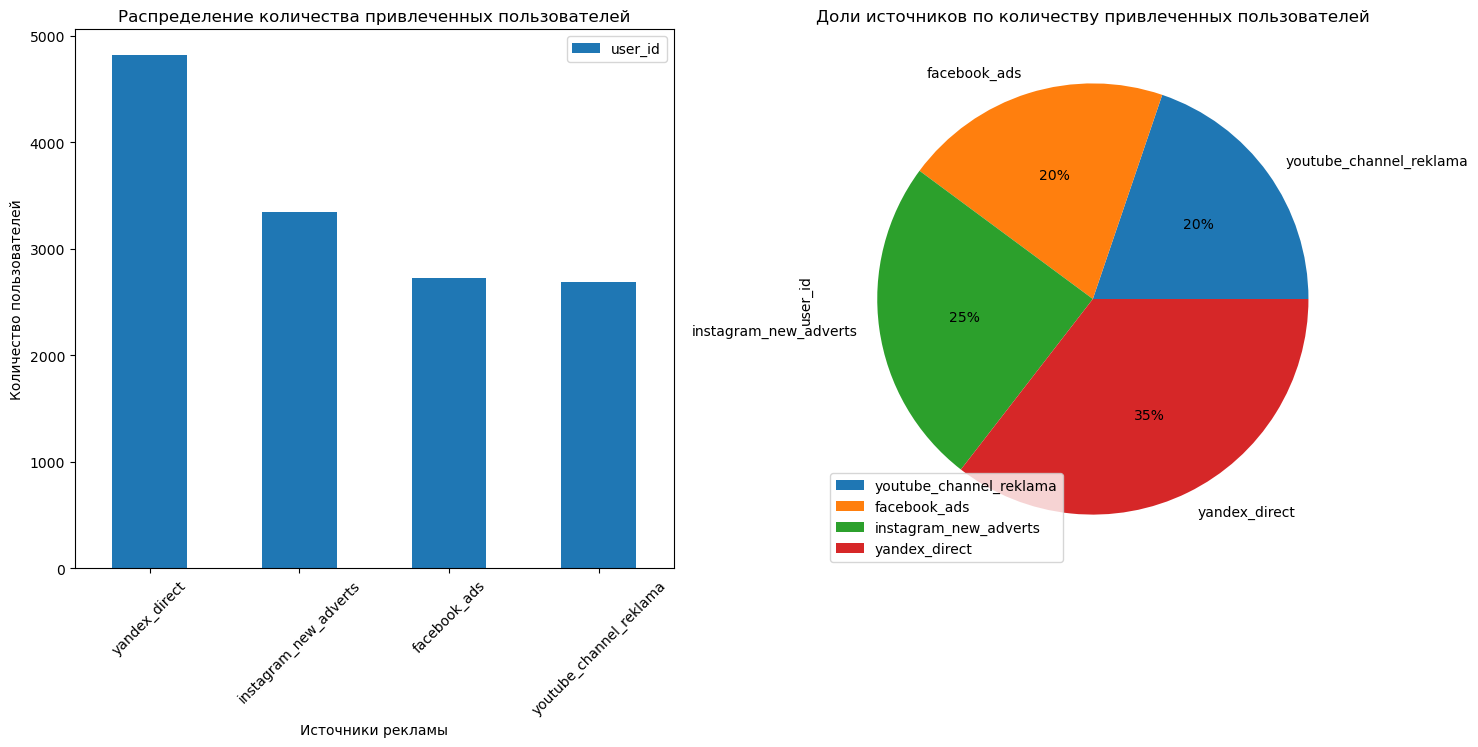

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(17, 7))

ax1 = (
    user_source.groupby('source')
    .agg({'user_id':'count'})
    .sort_values('user_id', ascending=False)
    .plot(kind='bar', ax=axes[0])
)
ax1.set_title('Распределение количества привлеченных пользователей')
ax1.set_ylabel('Количество пользователей')
ax1.set_xlabel('Источники рекламы')
ax1.tick_params(axis='x', labelrotation=45)

ax2 = (
    user_source.groupby('source')
    .agg({'user_id':'count'})
    .sort_values('user_id')
    .plot(kind='pie', y='user_id', autopct='%1.0f%%', ax=axes[1])
)
ax2.set_title('Доли источников по количеству привлеченных пользователей')
ax2.legend(loc='lower left')

plt.show()

Наиболее эффективным источником по количеству привлеченных пользователей, является yandex direct - 35% всех игроков перешли по данному каналу. Другие каналы составляют 25% (instagram new adverts) и 20% (facebook ads и youtube channel reklama) всего трафика.

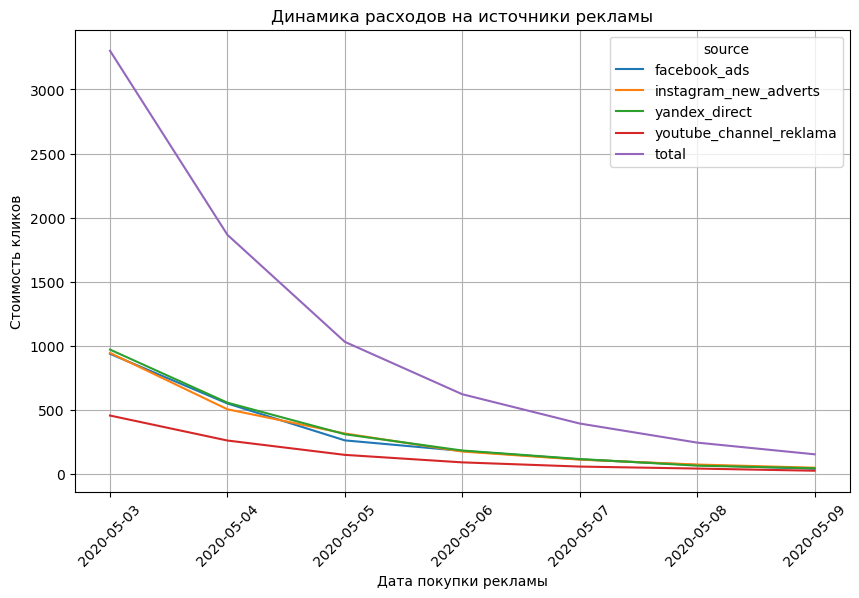

In [27]:
costs_per_day = ad_costs.pivot_table(index='day', columns='source', values='cost', aggfunc='sum')
costs_per_day['total'] = costs_per_day.apply(lambda x: x.sum(), axis=1)

costs_per_day.plot(figsize=(10, 6), grid=True)
plt.title('Динамика расходов на источники рекламы')
plt.xlabel('Дата покупки рекламы')
plt.ylabel('Стоимость кликов')
plt.xticks(rotation=45)
plt.show()

Наибольшие траты приходятся на первый день - 3 мая. Затем траты на рекламу во всех источниках только снижаются.  
Стоимости рекламы через facebook, instagram и yandex практически идентичны. Самые низкие траты на привлечение игроков через youtube.

In [28]:
print('Средняя стоимость привлечения одного игрока: {:.2f} р.'.format(
    ad_costs['cost'].sum() / len(profiles))
     )

Средняя стоимость привлечения одного игрока: 0.56 р.


In [29]:
#расчет показателя CAC по источникам рекламы
cac_by_source = ad_costs.groupby('source').agg({'cost':'sum'}).reset_index().merge(
    user_source.groupby('source').agg({'user_id':'count'}).reset_index(), on='source', how='left')

cac_by_source['cost_per_user'] = cac_by_source['cost'] / cac_by_source['user_id']
cac_by_source = cac_by_source.round({'cost':2, 'cost_per_user':2}).sort_values('cost', ascending=False)
cac_by_source

,source,cost,user_id,cost_per_user
2,yandex_direct,2233.11,4817,0.46
1,instagram_new_adverts,2161.44,3347,0.65
0,facebook_ads,2140.90,2726,0.79
3,youtube_channel_reklama,1068.12,2686,0.40


При близких значениях суммы затрат на рекламу в yandex direct, instagram new adverts и facebook_ads, через yandex пришло больше всего пользователей (4 817), а через facebook - меньше (2 726). Затраты на рекламу в youtube самые низкие, при этом, количество привлеченных пользователей сопоставимо с facebook.

Анализ рекламных активностей показывает:

- больше всего пользователей пришло через yandex direct - 35%;
- наибольшие расходы на маркетинг были в первый день покупки рекламы, затем расходы непрерывно снижаются по всем источникам;
- затраты по всем источникам сопоставимы, за исключением youtube, который обошелся дешевле всего, при этом количество привлеченных пользователей не значительно ниже, чем через facebook, а стоимость нового пользователя наименьшая по всем источникам;
- наиболее эффективным каналом привлечения можно назвать yandex (наибольший поток с наименьшей ценой пользователя), наименее эффективным - facebook (наиболее высокая стоимость за пользователя среди всех каналов).

## Анализ влияния источника перехода в игру на поведение пользователей

Рассмотрим показатели пользовательских активностей в разрезе источников перехода в игру.

In [30]:
#доли завершивших уровень по источникам
profiles.groupby('source').agg({'finished_stage':'mean'}).sort_values('finished_stage', ascending=False).round(2)

,finished_stage
source,
instagram_new_adverts,0.44
youtube_channel_reklama,0.43
yandex_direct,0.42
facebook_ads,0.42


In [31]:
#стратегии прохождения уровня по источникам
strategy_by_source = (
    profiles.query('finished_stage == True')
    .pivot_table(index='source', columns='strategy', values='user_id', aggfunc='count')
    .sort_values('fight', ascending=False)
)
strategy_by_source['fight_share'] = (
    strategy_by_source['fight'] / (strategy_by_source['fight'] + strategy_by_source['project'])
)
strategy_by_source = strategy_by_source.round({'fight_share':2})
strategy_by_source

strategy,fight,project,fight_share
source,,,
yandex_direct,1422,620,0.70
instagram_new_adverts,990,476,0.68
youtube_channel_reklama,780,379,0.67
facebook_ads,759,391,0.66


In [32]:
#количество построенных зданий в зависимости от источника
profiles.groupby('source').agg({'building_number':'mean'}).sort_values('building_number', ascending=False).round(2)

,building_number
source,
facebook_ads,9.59
instagram_new_adverts,9.51
yandex_direct,9.35
youtube_channel_reklama,9.30


In [33]:
#присоединение информации об источнике перехода к датасету с событиями
game_actions = game_actions.merge(user_source, on='user_id', how='left')

#распределение типов построек в зависимости от источника
(game_actions.pivot_table(index='source', columns='building_type', values='user_id', aggfunc='count')
 .sort_values('assembly_shop', ascending=False))

building_type,assembly_shop,research_center,spaceport
source,,,
yandex_direct,19295,4952,20785
instagram_new_adverts,13431,3537,14847
facebook_ads,11117,2945,12069
youtube_channel_reklama,10651,2703,11624


In [34]:
#средние лайфтаймы игроков по источникам 
profiles.groupby('source').agg({'lifetime':'mean'}).sort_values('lifetime', ascending=False).round(2)

,lifetime
source,
instagram_new_adverts,10.29
facebook_ads,10.22
yandex_direct,10.12
youtube_channel_reklama,10.08


Разница в относительном количестве прошедших уровень не значительно разнится по каналам и варьируется от 42% (yandex, facebook) до 44% (instagram). В целом, игроки чаще выбирают прохождение уровня через победу над другим игроком независимо от источника перехода в игру. Среднее количество построек на игрока варьируется от 9 до 10: наибольшее количество построек приходится на игроков пришедших через facebook (9.59), наименьшее- через youtube (9.30). Наиболее популярным типом постройки является spaceport по всем источникам. Среднее время в игре составляет между 10 до 11 днями: от 10.08 для игроков из youtube до 10.29 для игроков из instagram.


## Проверка статистических гипотез

### Зависимость времени завершения уровня от способа прохождения

Проверим гипотезу о том, что время завершения уровня различается в зависимости способа прохождения: через реализацию проекта или через победу над первым игроком.

* H0: Время зтраченное на завершение уровня не различается в зависимости способа его прохождения.
* H1: Время зтраченное на завершение уровня различается в зависимости способа его прохождения.

Для проверки гипотез о равенстве средних двух совокупностей применяется T-test.

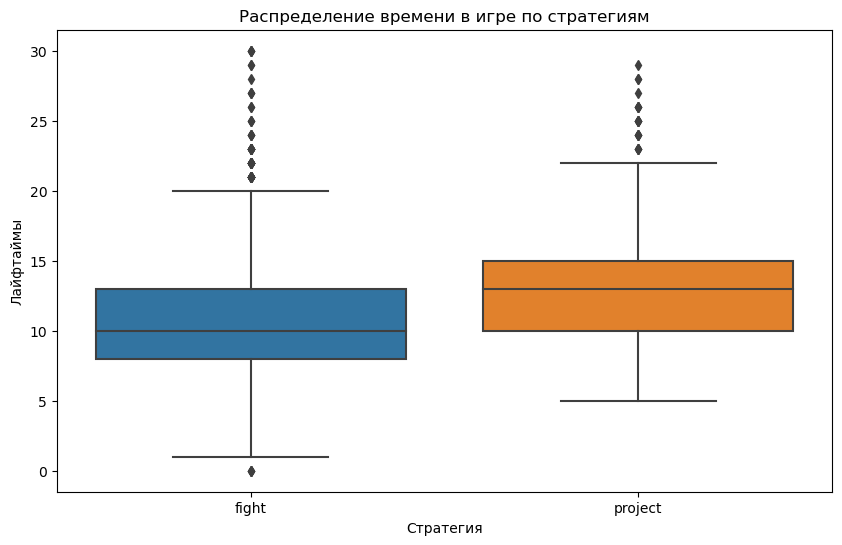

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=profiles.query('finished_stage == True'), y='lifetime', x='strategy')
plt.title('Распределение времени в игре по стратегиям')
plt.xlabel('Стратегия')
plt.ylabel('Лайфтаймы')
plt.show()

In [36]:
#статистики лайфтаймов
profiles_statistics = profiles.pivot_table(index='strategy', values='lifetime', aggfunc=['mean', 'var', 'std'])
profiles_statistics = profiles_statistics.round(2)
profiles_statistics

,mean,var,std
,lifetime,lifetime,lifetime
strategy,,,
fight,10.61,16.86,4.11
project,12.96,12.44,3.53


In [37]:
#выборки для теста
sample1_1 = profiles.query('strategy == "project"')['lifetime']
sample1_2 = profiles.query('strategy == "fight"')['lifetime']

In [38]:
print('Размер выборки со стратегией project:', len(sample1_1))
print('Размер выборки со стратегией fight:', len(sample1_2))

Размер выборки со стратегией project: 1866
Размер выборки со стратегией fight: 3951


In [39]:
alpha = .05 #принимаемый уровнь значимости
results = st.ttest_ind(sample1_1, sample1_2, equal_var = False) #так как дисперсии отличаются, применяем параметр equal_var=False

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.6237027268065695e-106
Отвергаем нулевую гипотезу


Время завершения уровня через реализацию проекта больше в среднем на 2 дня, чем через победу над другим игроком. Стандартное отклонение составляет 3.5 дней для проекта и 4.1 для поединка. Отметим, что совокупность игроков, выбравших статегию боя более чем в два раза превышает численность выбравших статегию реализации проекта.

По результатам теста нулевая гипотеза не принимается в пользу альтернативной. Таким образом, можно утверждать, что длительность прохождения уровня различается в зависимости выбранного способа (на уровне значимости 0.05)

### Зависимость количества построек от способа прохождения уровня

Проверим гипотезу о том, что количество построек на игрока различается в зависимости способа прохождения.

* H0: Количество построек не различается в зависимости способа прохождения уровня.
* H1: Количество построек различается в зависимости способа прохождения уровня.

In [40]:
#статистики распределения построек
profiles_statistics2 = profiles.pivot_table(index='strategy', values='building_number', aggfunc=['mean', 'var', 'std'])
profiles_statistics2 = profiles_statistics2.round(2)
profiles_statistics2

,mean,var,std
,building_number,building_number,building_number
strategy,,,
fight,9.41,9.36,3.06
project,12.65,4.68,2.16


In [41]:
#выборки для теста
sample2_1 = profiles.query('strategy == "project"')['building_number']
sample2_2 = profiles.query('strategy == "fight"')['building_number']

In [42]:
alpha = .05 #принимаемый уровнь значимости
results2 = st.ttest_ind(sample2_1, sample2_2, equal_var = False) #так как дисперсии отличаются, применяем параметр equal_var=False

print('p-значение:', results2.pvalue)

if results2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.0
Отвергаем нулевую гипотезу


Среднее количество построек, также, различается и сопоставимо с днями, затраченными на прохождение уровня, в зависимости от выбранной стратегии. Количество построек за первый уровень больше у игроков, которые выбрали стратегию реализации проекта (12.6), чем у выбравших стратегию поединка (9.4). Стандартное отклонение составляет 2.1 для проекта и 3.0 для поединка.

Полученное значение p-value говорит о том, что вероятность случайно получить различия равна 0. Соответственно, стоит отвергнуть нулевую гипотезу об отсутствии различий в числе построек в зависимости способа прохождения уровня.

По итогам статистической проверки гипотез на выбранном уровне критерия значимости 5%, нулевые гипотезы были отвергнуты, что позволяет сделать вывод о том, что время прохождения уровня и количество построек различаются в зависимости способа прохождения уровня. На завершение уровня через реализацию проекта в среднем необходимо больше времени, что, соответственно, позволяет строить больше зданий. Таким образом, стратегия победы через проект более предпочтительна при монетизации игры через показы рекламы на экране выбора постройки.

## Общие выводы

За период показов рекламы с 4 по 10 мая 2020 в игру пришло 13 576 новых пользователей, из которых 42% завершили первый уровень. Большая доля игроков пришла через yandex - 35%, через instagram - 25%, через facebook и youtube по 20%. Самые низкие затраты на рекламу в youtube, расходы на остальные рекламные источники сопоставимы друг с другом. При этом, стоимость привлечения однго пользователя через youtube наиболее низкая (0.40), затем через yandex (0.46), instagram (0.65) и самая дорогая через facebook (0.79). 

Анализ рекламных источников не выявил значительных различий в поведении игроков. В целом, независимо от источника популярней способ прохождения через победу над другим игроком: для пользователей из yandex доля составляет 69%, из facebook - 66%, для пользователей из других источников - 67%. Среднее количество построек на игрока 9.4, по источникам разброс составляет от 9.3 - youtube, до 9.6 - facebook. Лайфтаймы игроков, также, различаются не значительно - от 10.1 для игроков из youtube до 10.3 для игроков из instagram.

Рекомендации по итогам исследования: 
* пересмотреть маркетинговые расходы в пользу более эффективных источников (от facebook к yandex и youtube);
* целесообразно продвижение менее популярной стратегии прохождения уровня через реализацию проекта, так как время в игре и количество построек при реализации проекта выше, чем при поединке с другим игроком.